<a href="https://colab.research.google.com/github/HolgerCG/COLABTRAINYOLOV8/blob/main/TrainModelYOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


Wed Jul 10 00:23:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
pip install ultralytics==8.0.196

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.30GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.25.2>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LezfY2UegD2Yg5sIb8MI")
project = rf.workspace("computer-vision-j3chq").project("minisumo")
version = project.version(1)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/MiniSumo-1/data.yaml epochs=30 imgsz=640


100% 49.7M/49.7M [00:00<00:00, 239MB/s]
New https://pypi.org/project/ultralytics/8.2.51 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/MiniSumo-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_widt

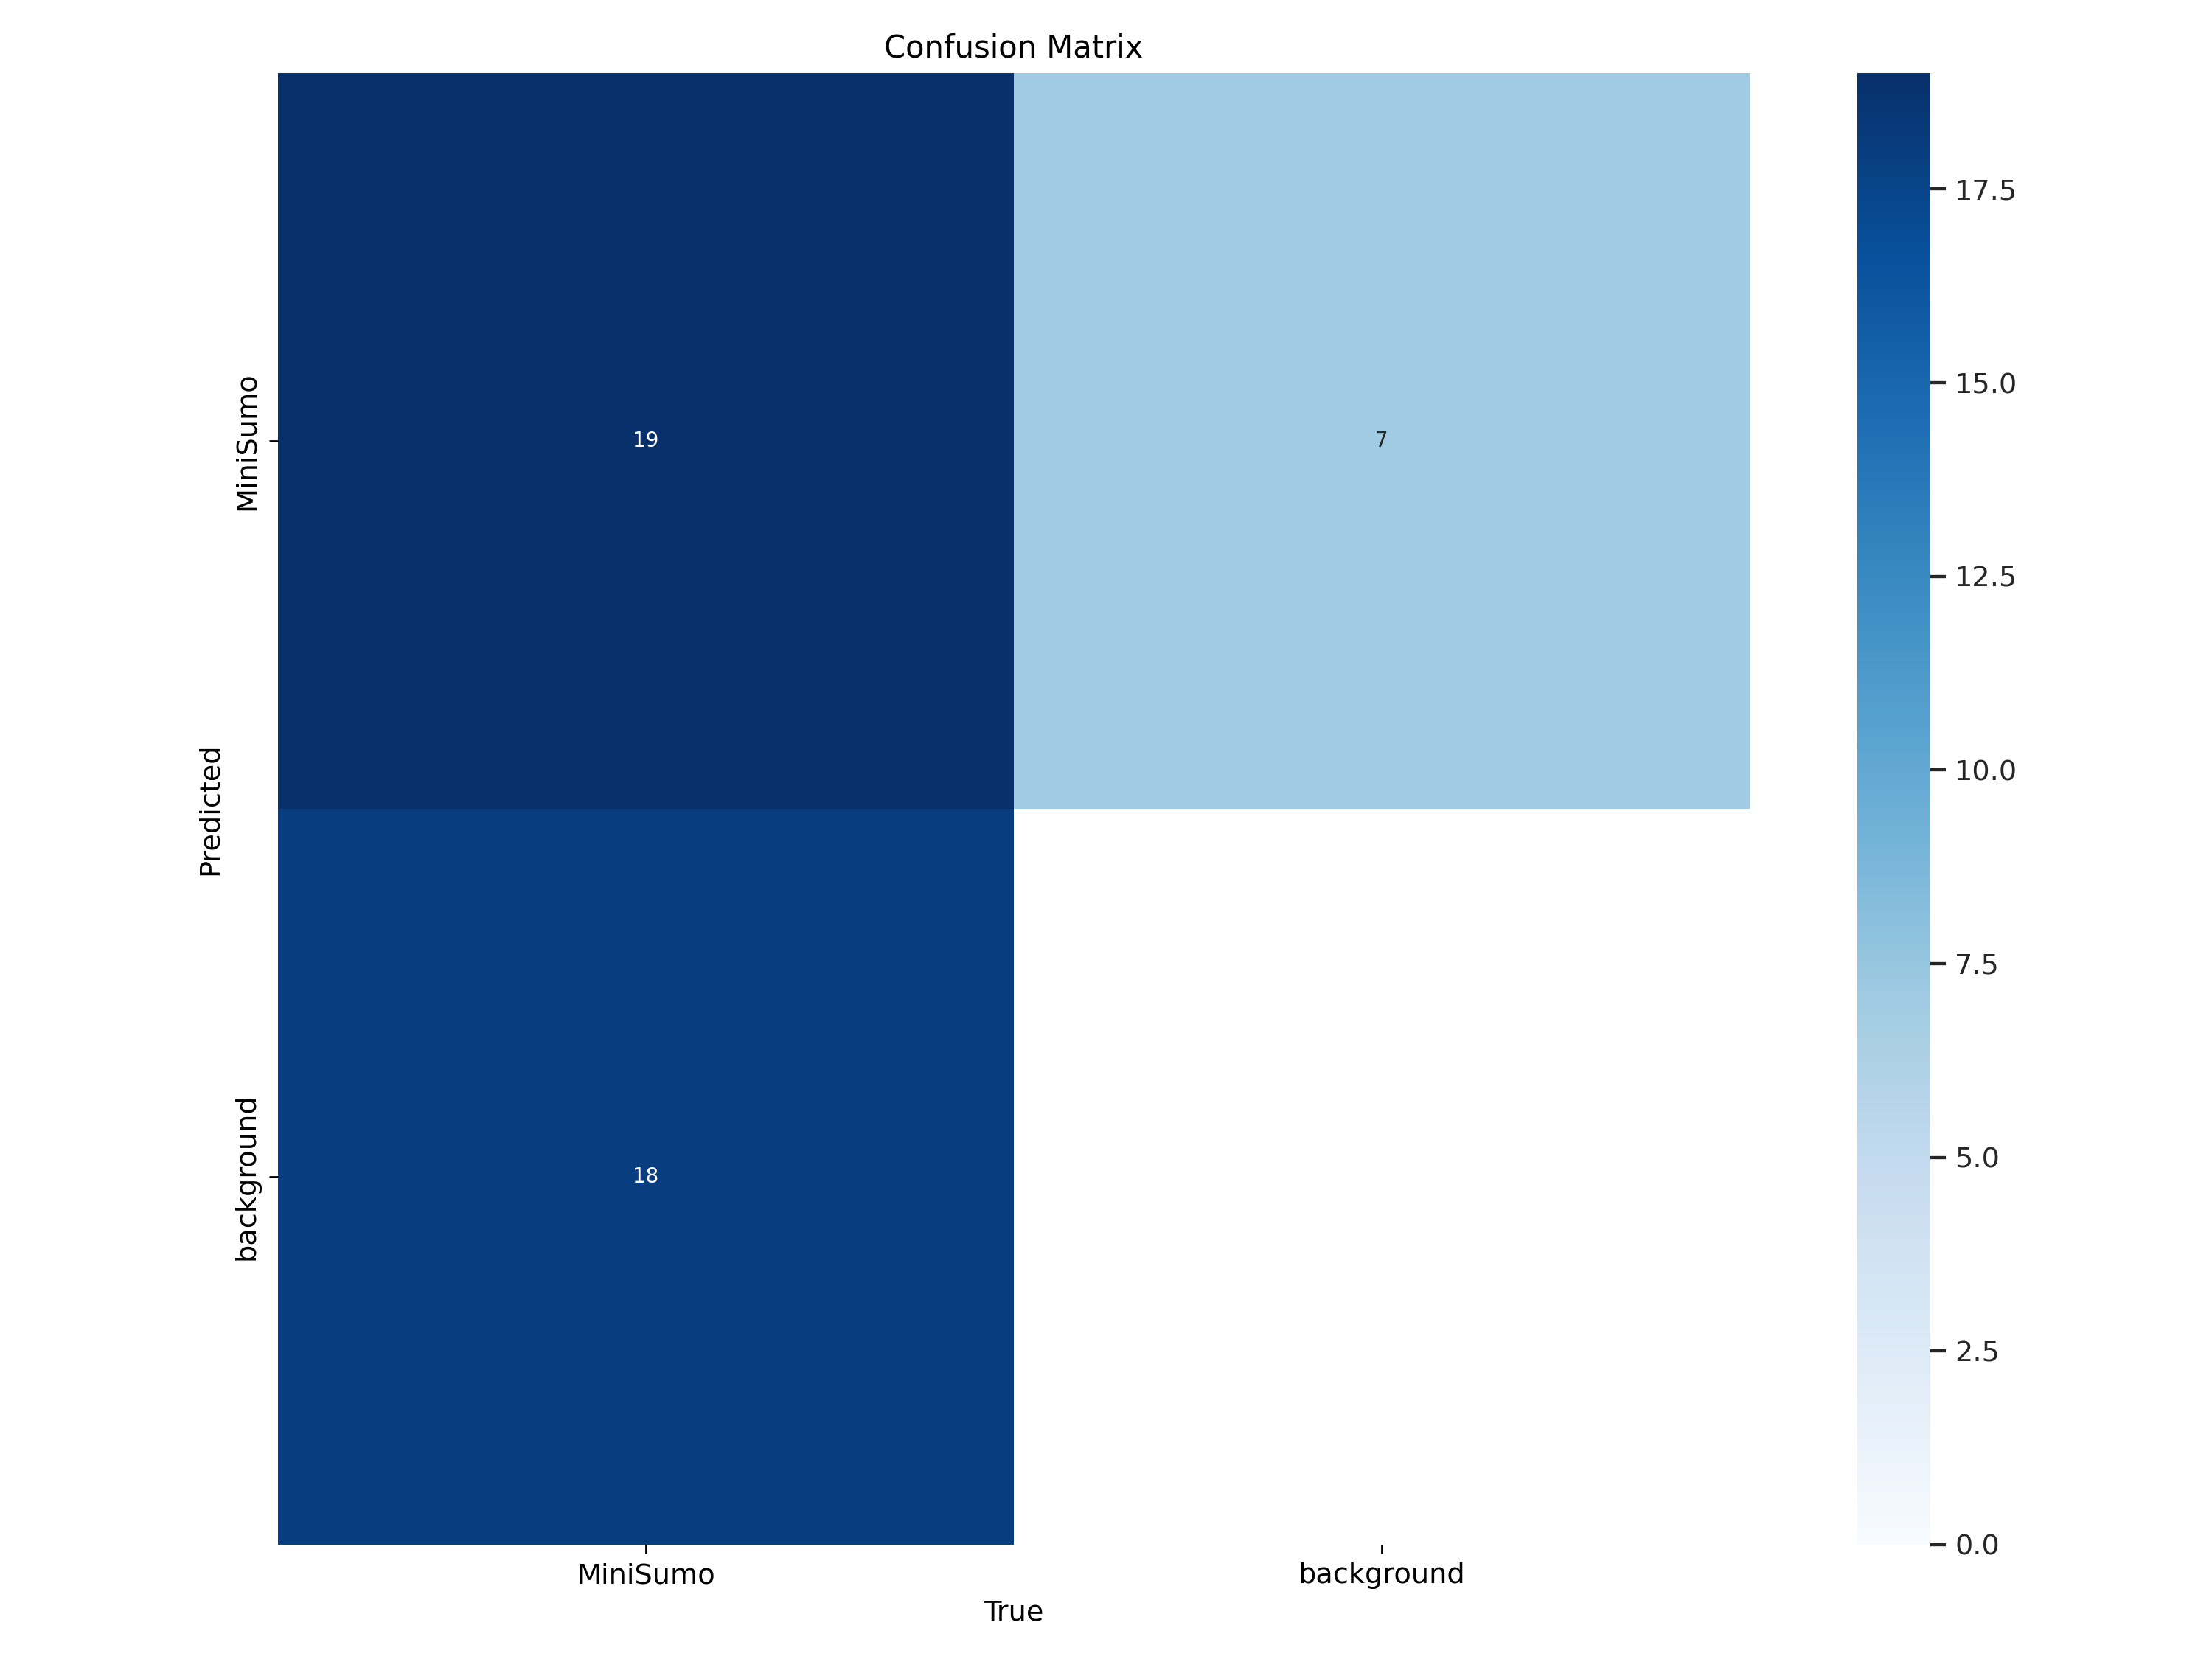

In [ ]:
Image(f'/content/runs/detect/train/confusion_matrix.png', width=400)

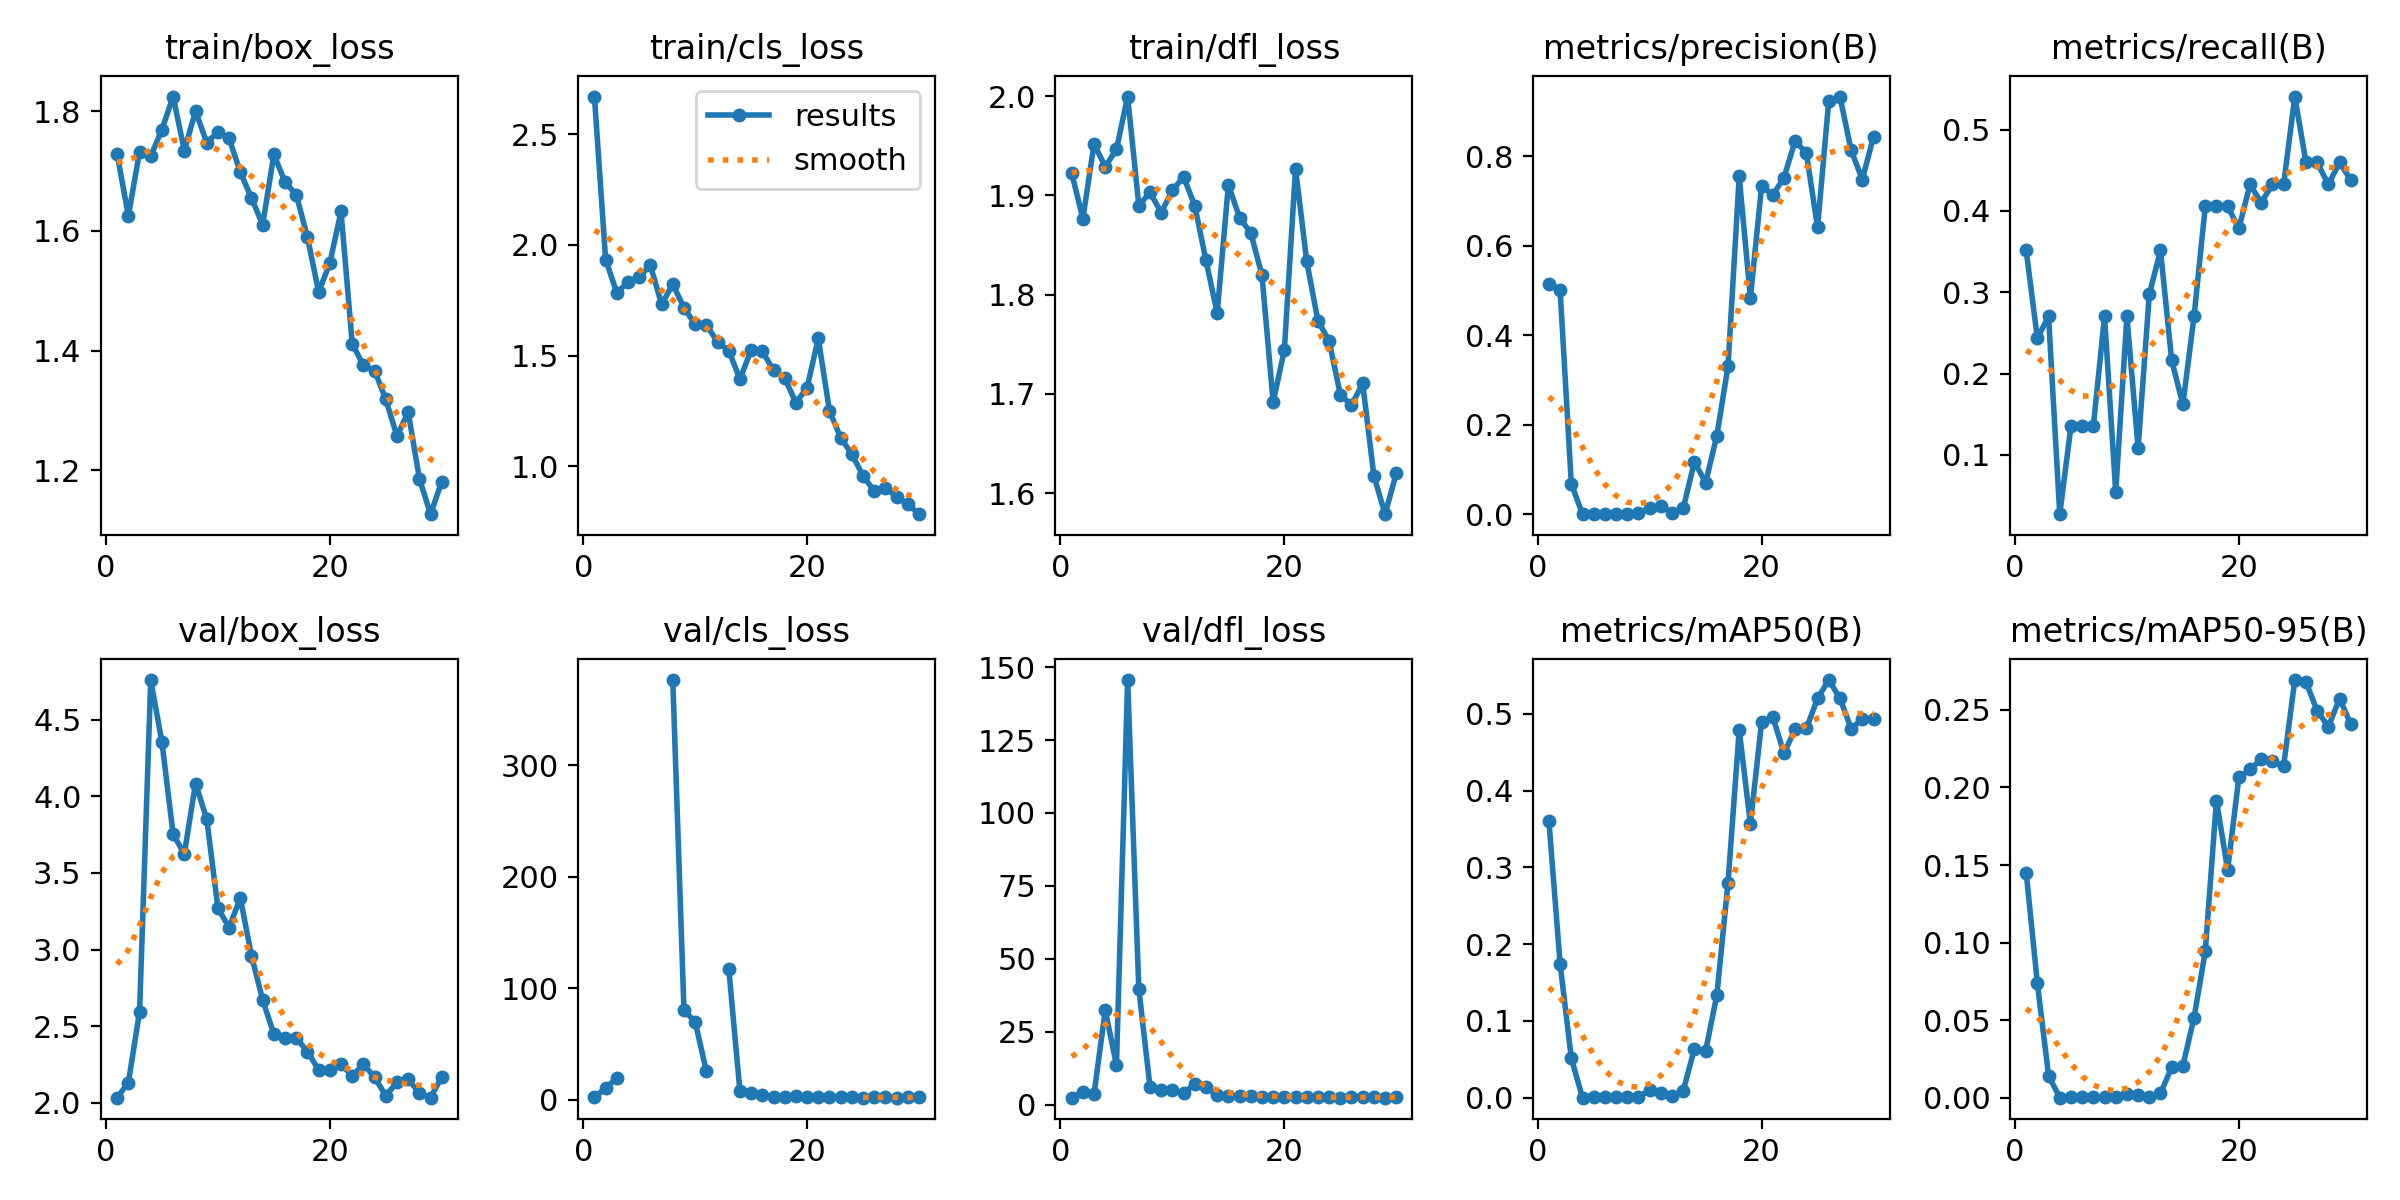

In [ ]:
Image(f'/content/runs/detect/train/results.png', width=400)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/MiniSumo-1/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/MiniSumo-1/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.06s/it]
                   all         19         37      0.924      0.459      0.544      0.274
Speed: 0.3ms preprocess, 37.7ms inference, 0.0ms loss, 54.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/MiniSumo-1/test/images

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/9 /content/MiniSumo-1/test/images/19_jpg.rf.180a4f759f1c79ef06f460ea85d1b2d0.jpg: 640x640 2 MiniSumos, 37.1ms
image 2/9 /content/MiniSumo-1/test/images/30_png.rf.0a002b26c9f2b3be1efdd2c88a88b4ef.jpg: 640x640 1 MiniSumo, 37.1ms
image 3/9 /content/MiniSumo-1/test/images/31_jpg.rf.286a6ae67239107be3b8a7363a712c59.jpg: 640x640 1 MiniSumo, 37.0ms
image 4/9 /content/MiniSumo-1/test/images/3_png.rf.ec0f521e6cb2cc753019a3f9cf6339bc.jpg: 640x640 1 MiniSumo, 37.0ms
image 5/9 /content/MiniSumo-1/test/images/57_jpg.rf.25085e2597561378b5f8f9fae9a05900.jpg: 640x640 1 MiniSumo, 37.1ms
image 6/9 /content/MiniSumo-1/test/images/68_jpg.rf.ed31980f5ba7b837895592eaf0acdf06.jpg: 640x640 1 MiniSumo, 30.1ms
image 7/9 /content/MiniSumo-1/test/images/78_jpg.rf.6d4a2643cd570f9f5198b0d35bcb6ccb.j

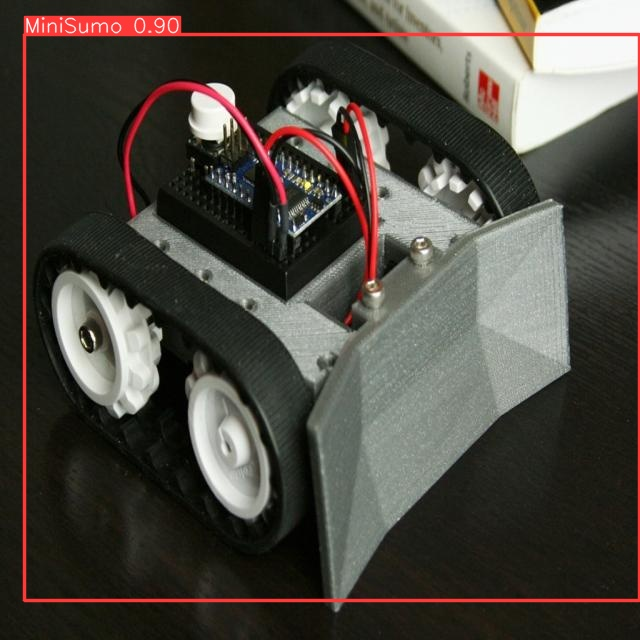

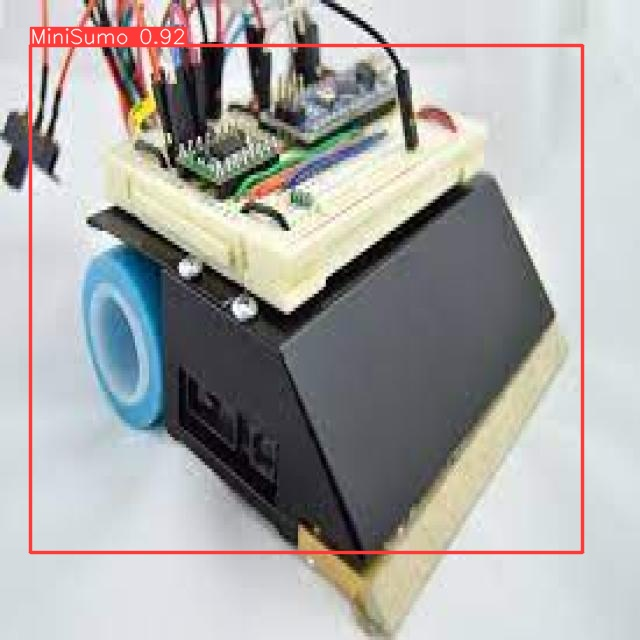

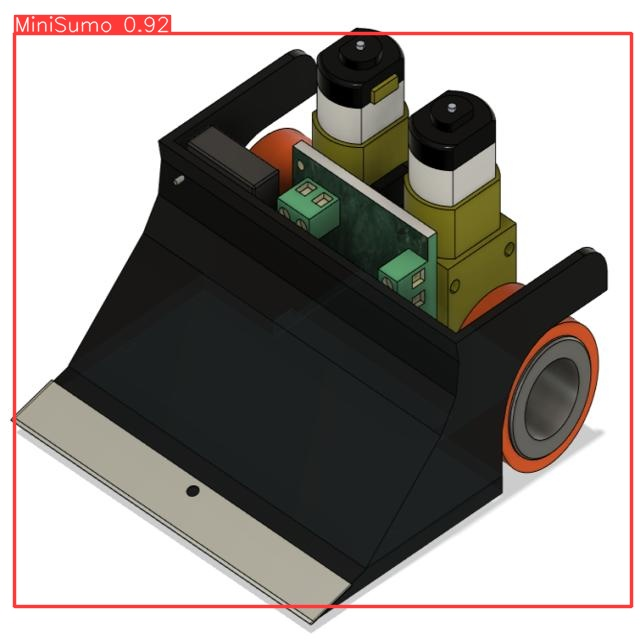

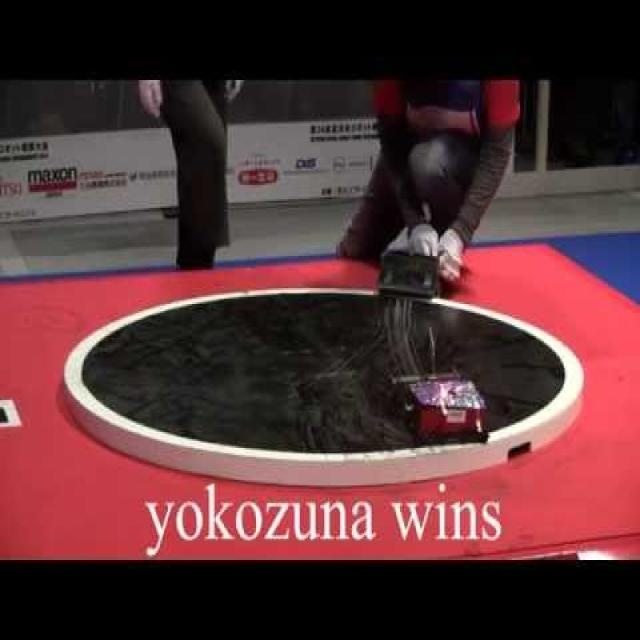

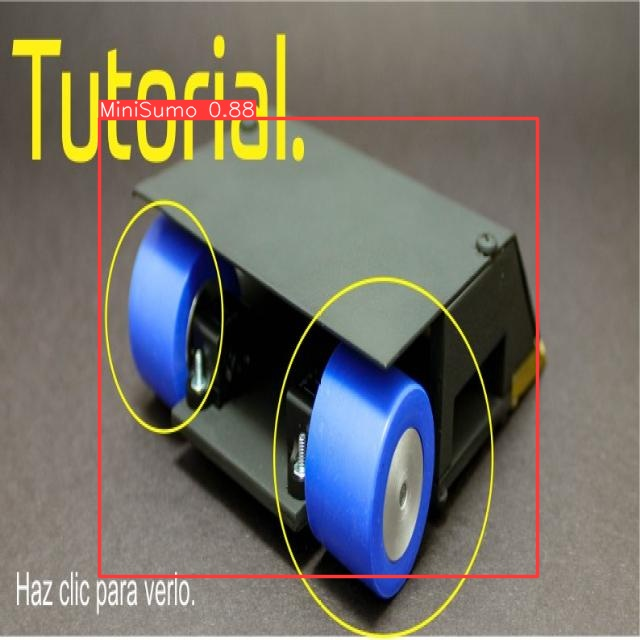

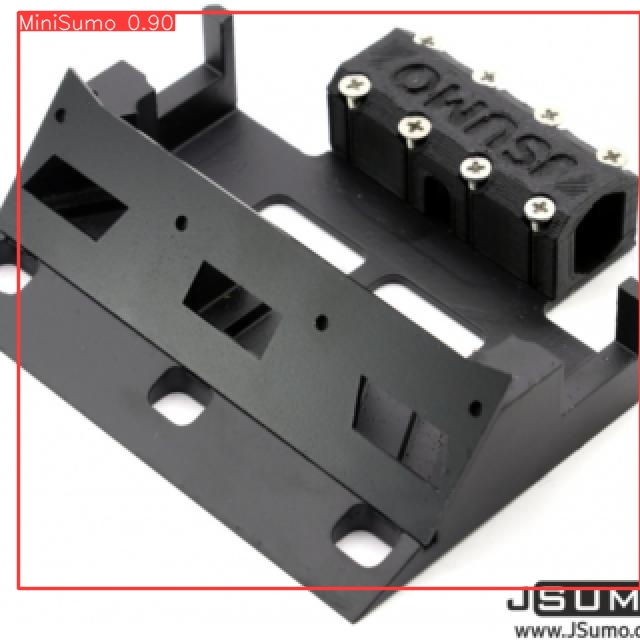

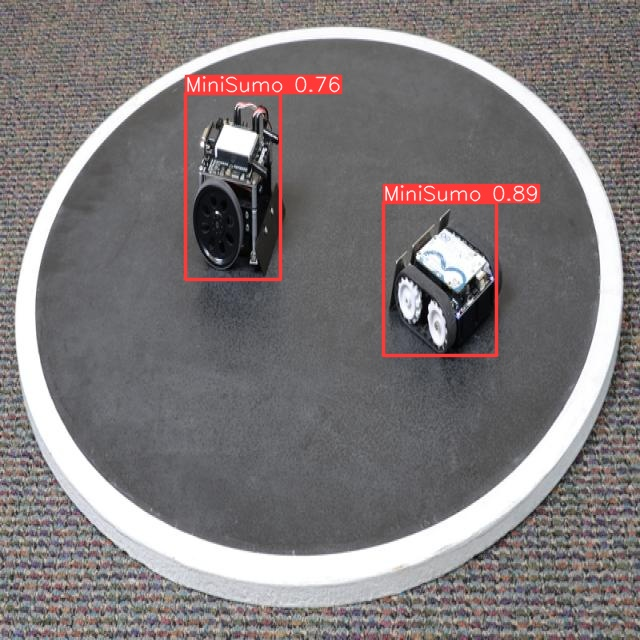

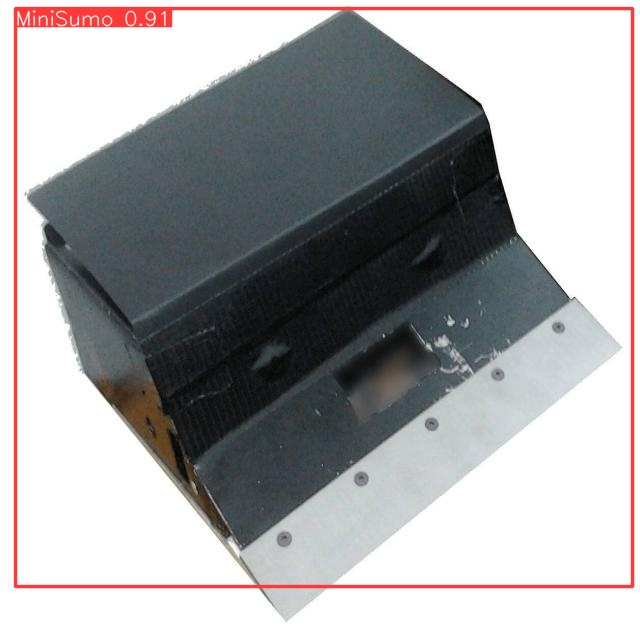

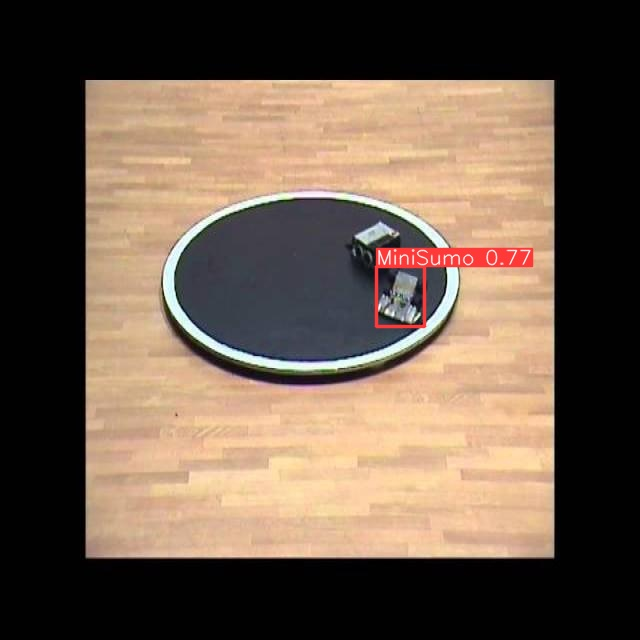

In [ ]:
import glob
from IPython.display import Image, display
for imageName in glob.glob('/content/runs/detect/predict/*.jpg'):
    display(Image(filename=imageName,height=100))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/Fotoyvid

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/5 /content/Fotoyvid/images (14).jpg: 512x640 1 MiniSumo, 133.2ms
image 2/5 /content/Fotoyvid/images (16).jpg: 384x640 1 MiniSumo, 86.3ms
image 3/5 /content/Fotoyvid/images (18).jpg: 544x640 1 MiniSumo, 99.5ms
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
video 4/5 (1/758) /content/Fotoyvid/MiniRC.mp4: 640x384 (no detections), 90.3ms
video 4/5 (2/758) /content/Fotoyvid/MiniRC.mp4: 640x384 (no detections), 25.0ms
video 4/5 (3/758) /content/Fotoyvid/MiniRC.mp4: 640x38

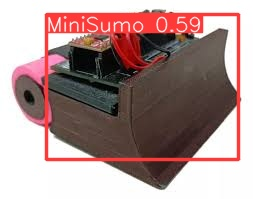

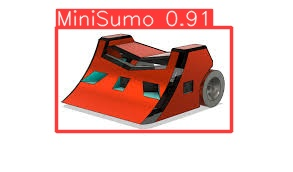

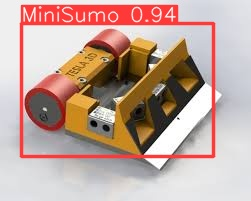

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob('/content/runs/detect/predict2/*.jpg'):
    display(Image(filename=image_path,height=100))
    print("\n")


In [ ]:
import glob
import os

# Get the list of video files in the predict folder
video_files = glob.glob('/content/runs/detect/predict2/*.avi')

# Display each video file
for video_file in video_files:
    # Extract the video filename without the path
    video_filename = os.path.basename(video_file)

    # Display the video using HTML5 video tag
    display(HTML(f"""
    <video width="320" controls>
        <source src="{video_file}" type="video/mp4">
    </video>
    <p>{video_filename}</p>
    """))

    # Print a newline
    print("\n")


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/Fotoyvid/MiniRC.mp4

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
video 1/1 (1/758) /content/Fotoyvid/MiniRC.mp4: 640x384 (no detections), 124.1ms
video 1/1 (2/758) /content/Fotoyvid/MiniRC.mp4: 640x384 (no detections), 26.0ms
video 1/1 (3/758) /content/Fotoyvid/MiniRC.mp4: 640x384 (no detections), 24.9ms
video 1/1 (4/758) /content/Fotoyvid/MiniRC.mp4: 640x384 (no detections), 25.0ms
video 1/1 (5/758) /content/Fotoyvid/MiniRC.mp4: 640x384 (no detections), 24.9ms
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (6/758) /content/Fot